### VERY Important  : XOR 매우 중요


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # for reproducibility

* Hyperparameters

In [0]:
learning_rate = 0.1
nb_epoch = 10000

* Dataset

In [0]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]

In [0]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [6]:
X = tf.placeholder(tf.float32, [None, 2]) #레이어를 쌓는 작업
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')

hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) #GradientDescentOptimizer 얘는 수학적 개념을 스스로 하게 해주는 도구 미분이라든가 하는 코딩을 할 필요가없다.

In [0]:
# Launch graph
sess = tf.Session()

In [0]:
# TensorFlow 변수들(variables) 초기화 (Initialization)
sess.run(tf.global_variables_initializer())

In [0]:
import matplotlib.pyplot as plt

In [11]:
for i in range(nb_epoch+1):
    sess.run(train, feed_dict={X: x_data, Y: y_data})

    if i % 1000 ==0:
        c1 = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        print('step={} / cost={}'.format(i, c1)) #힌트는 append cost를 저장하는 코드

step=0 / cost=0.2801596224308014
step=1000 / cost=0.24803078174591064
step=2000 / cost=0.23966965079307556
step=3000 / cost=0.21757772564888
step=4000 / cost=0.18139863014221191
step=5000 / cost=0.11436893790960312
step=6000 / cost=0.048607632517814636
step=7000 / cost=0.024382177740335464
step=8000 / cost=0.015112246386706829
step=9000 / cost=0.010631653480231762
step=10000 / cost=0.008081658743321896


* HW : 위의 코드를 변형하여 XOR 학습시 얻어진 Cost 그래프를 그리시오. Hint : List 사용

In [0]:
import matplotlib.pyplot as plt

In [13]:
sess.run(tf.global_variables_initializer())
a=[]
for i in range(nb_epoch+1):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if i % 1000 ==0:
        c1 = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        a.append(c1)
        print('step={} / cost={}'.format(i, c1)) #힌트는 append cost를 저장하는 코드i

step=0 / cost=0.432524174451828
step=1000 / cost=0.25042587518692017
step=2000 / cost=0.25018465518951416
step=3000 / cost=0.25006303191185
step=4000 / cost=0.24997621774673462
step=5000 / cost=0.24988719820976257
step=6000 / cost=0.24976353347301483
step=7000 / cost=0.24955043196678162
step=8000 / cost=0.24911755323410034
step=9000 / cost=0.248097226023674
step=10000 / cost=0.2453543245792389


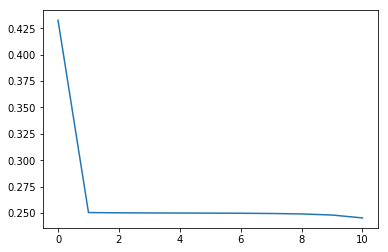

In [14]:
plt.plot(a)

### Check the results

In [15]:
print(W1)

<tf.Variable 'weight1:0' shape=(2, 2) dtype=float32_ref>


In [16]:
print(sess.run(W1))

[[-0.68442243 -0.9289464 ]
 [ 0.5349491  -0.9530855 ]]


In [17]:
for i in range(4):
    x1 = x_data[[i], :]

    l1 = tf.sigmoid(tf.matmul(x1, W1) + b1)
    l2 = tf.sigmoid(tf.matmul(l1, W2) + b2)
    #l2cast = tf.cast(l2 > 0.5, dtype=tf.float32)
    print( i, sess.run(l2))
    #print( i, sess.run(l2), sess.run(l2cast), y_data[[i], :])   

0 [[0.47108555]]
1 [[0.5197129]]
2 [[0.49098206]]
3 [[0.51934654]]


### 참고 : Sigmoid

In [18]:
y1 = 1.0
y2 = sess.run(tf.sigmoid(y1))
print('{} --> {}'.format(y1, y2))

1.0 --> 0.7310585975646973


Sigmoid를 그려볼까요?

In [19]:
x1 = np.arange(-10,10, 0.5)
print(x1)

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]


In [20]:
y1 = sess.run(tf.sigmoid(x1))
print(y1)

[4.53978687e-05 7.48462275e-05 1.23394576e-04 2.03426978e-04
 3.35350130e-04 5.52778637e-04 9.11051194e-04 1.50118226e-03
 2.47262316e-03 4.07013772e-03 6.69285092e-03 1.09869426e-02
 1.79862100e-02 2.93122308e-02 4.74258732e-02 7.58581800e-02
 1.19202922e-01 1.82425524e-01 2.68941421e-01 3.77540669e-01
 5.00000000e-01 6.22459331e-01 7.31058579e-01 8.17574476e-01
 8.80797078e-01 9.24141820e-01 9.52574127e-01 9.70687769e-01
 9.82013790e-01 9.89013057e-01 9.93307149e-01 9.95929862e-01
 9.97527377e-01 9.98498818e-01 9.99088949e-01 9.99447221e-01
 9.99664650e-01 9.99796573e-01 9.99876605e-01 9.99925154e-01]


In [0]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sigmoid')

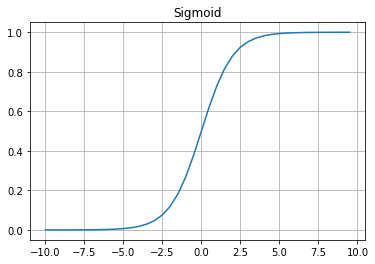

In [22]:
plt.plot(x1, y1)
plt.grid()
plt.title('Sigmoid')